In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

customers_copy = customers.copy()
products_copy = products.copy()
transactions_copy = transactions.copy()

# Display basic information about datasets
print("Customers Dataset Info:\n", customers.info())
print("\nProducts Dataset Info:\n", products.info())
print("\nTransactions Dataset Info:\n", transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
Customers Dataset Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Products Dataset Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null C

In [16]:
print("Customers Dataset Summary:")
print(customers.describe(include='all'))

Customers Dataset Summary:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00


In [4]:
# Check for missing values
print("\nMissing Values in Customers:\n", customers.isnull().sum())
print("\nMissing Values in Products:\n", products.isnull().sum())
print("\nMissing Values in Transactions:\n", transactions.isnull().sum())



Missing Values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
# Statistical summary of numerical columns
print("\nCustomers Summary:\n", customers.describe(include='all'))
print("\nProducts Summary:\n", products.describe(include='all'))
print("\nTransactions Summary:\n", transactions.describe(include='all'))


Customers Summary:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Summary:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                  

In [6]:
# Unique counts of key columns
print("\nUnique Customers:", customers['CustomerID'].nunique())
print("Unique Products:", products['ProductID'].nunique())
print("Unique Transactions:", transactions['TransactionID'].nunique())



Unique Customers: 200
Unique Products: 100
Unique Transactions: 1000


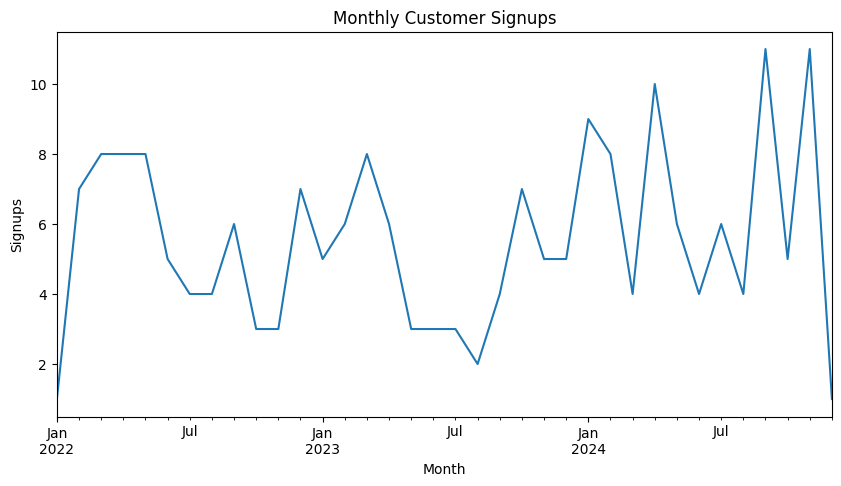

In [8]:
# Date-related analysis
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Signup trends
df_signup = customers.groupby(customers['SignupDate'].dt.to_period('M')).size()
df_signup.plot(kind='line', title='Monthly Customer Signups', ylabel='Signups', xlabel='Month', figsize=(10, 5))
plt.show()


<ipython-input-12-4009de5f2708>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity', y='ProductName', data=top_products, palette='viridis',hue=None, legend=False)


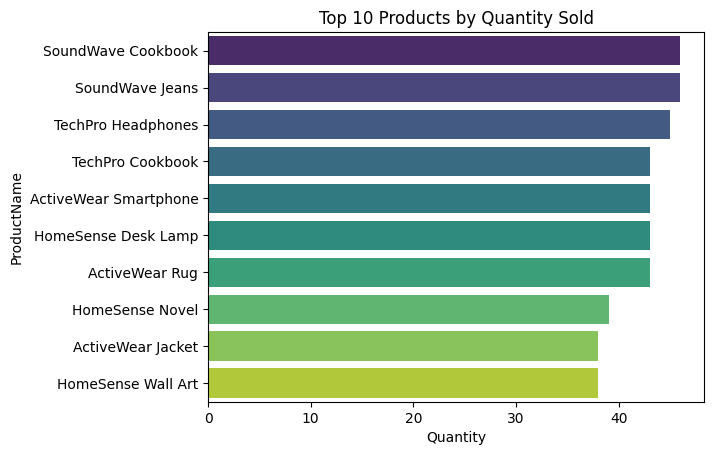

In [12]:
# Top 10 products by quantity sold
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10).reset_index()
top_products = top_products.merge(products, on='ProductID', how='left')
sns.barplot(x='Quantity', y='ProductName', data=top_products, palette='viridis',hue=None, legend=False)
plt.title('Top 10 Products by Quantity Sold')
plt.show()

<ipython-input-13-4b49332d0525>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='Region', data=region_revenue, palette='coolwarm')


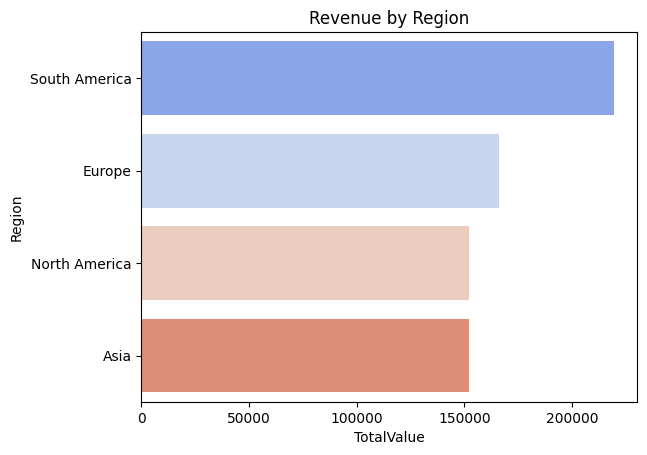

In [13]:
# Revenue analysis by region
transactions = transactions.merge(customers, on='CustomerID', how='left')
region_revenue = transactions.groupby('Region')['TotalValue'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='TotalValue', y='Region', data=region_revenue, palette='coolwarm')
plt.title('Revenue by Region')
plt.show()

<ipython-input-14-5238f6fdc17d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalValue', y='Category', data=category_sales, palette='Set2')


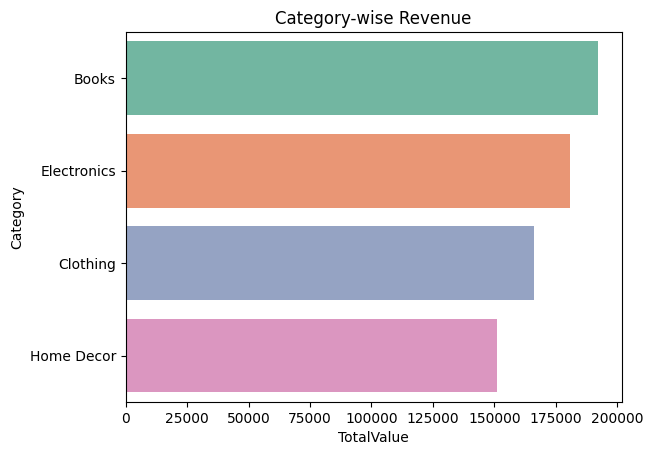

In [14]:
# Category-wise sales analysis
transactions = transactions.merge(products, on='ProductID', how='left')
category_sales = transactions.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='TotalValue', y='Category', data=category_sales, palette='Set2')
plt.title('Category-wise Revenue')
plt.show()

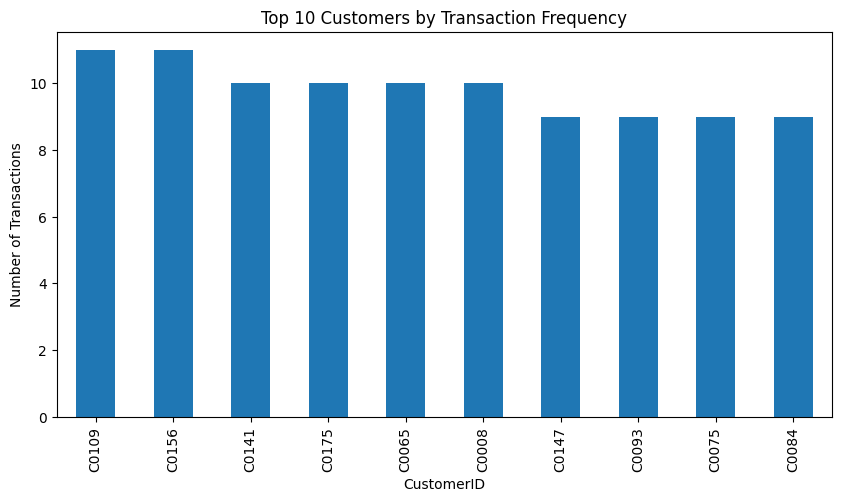

In [15]:
# Customer transaction frequency
customer_frequency = transactions['CustomerID'].value_counts().head(10)
customer_frequency.plot(kind='bar', title='Top 10 Customers by Transaction Frequency', figsize=(10, 5))
plt.xlabel('CustomerID')
plt.ylabel('Number of Transactions')
plt.show()


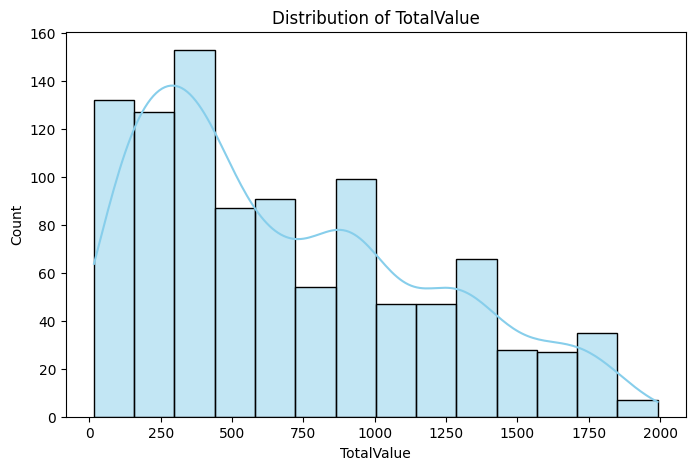

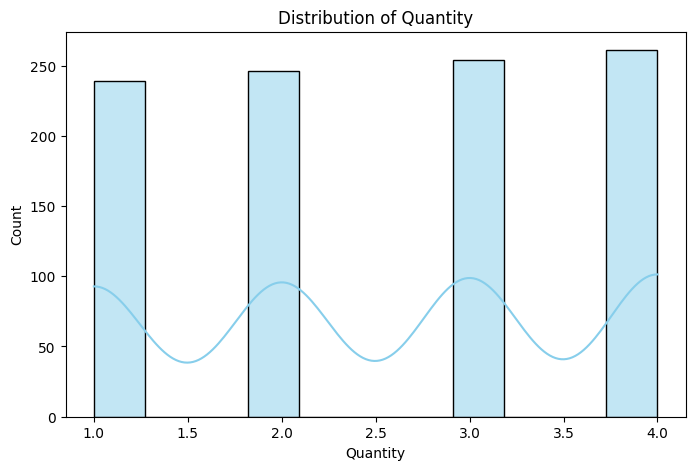

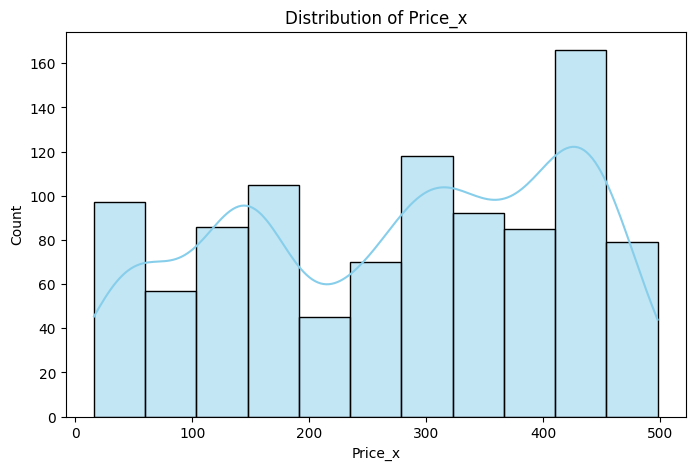

In [53]:
# Plot distributions of numerical variables
for col in ['TotalValue','Quantity','Price_x']:  # Add relevant numerical columns
    plt.figure(figsize=(8, 5))
    sns.histplot(transactions[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

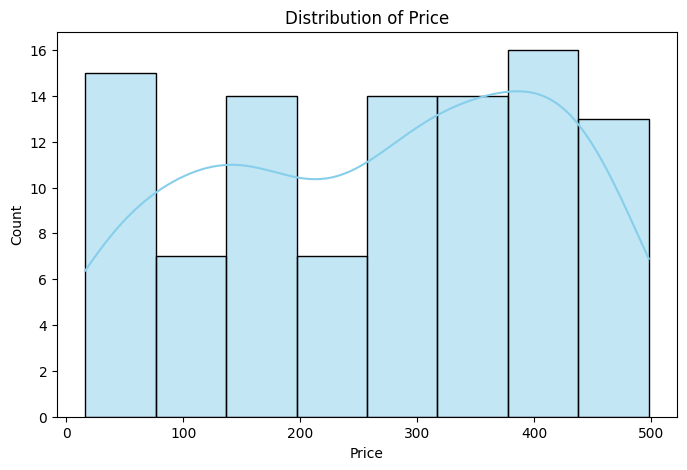

In [42]:
# Plot distributions of numerical variables
for col in ['Price']:  # Add relevant numerical columns
    plt.figure(figsize=(8, 5))
    sns.histplot(products[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.show()

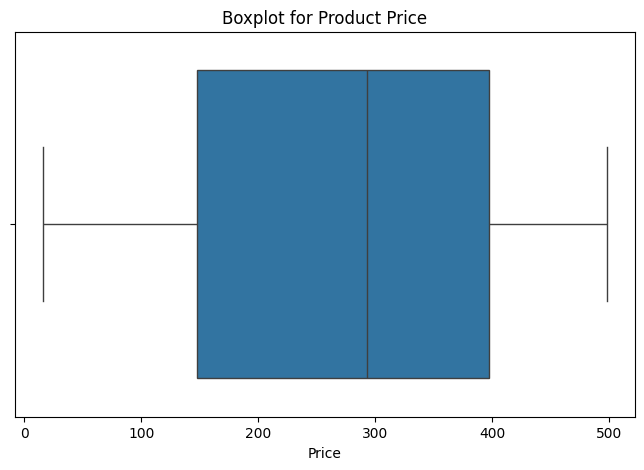

In [49]:
# Boxplots to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=products['Price'])
plt.title("Boxplot for Product Price")
plt.show()


<ipython-input-56-1b26b7786dec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x="Region", palette="viridis")


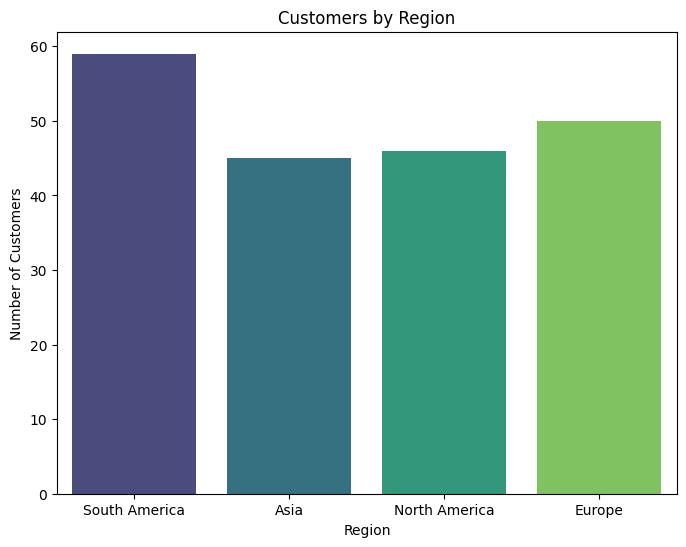

<ipython-input-56-1b26b7786dec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, x="Category", palette="Set2")


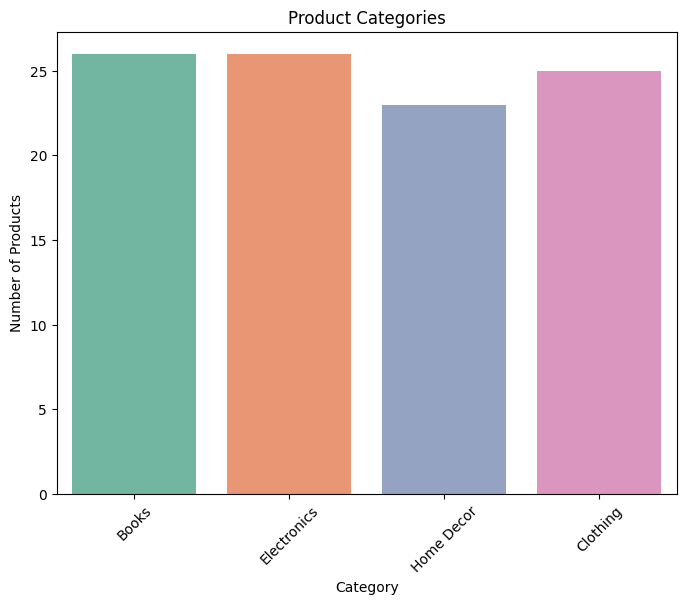

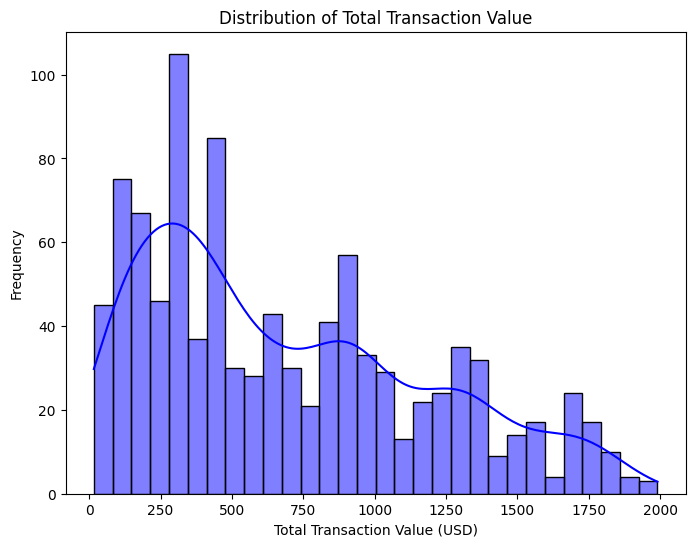

In [56]:
#Univariate Analysis
# Customers by Region
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x="Region", palette="viridis")
plt.title("Customers by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

# Product Categories
plt.figure(figsize=(8, 6))
sns.countplot(data=products, x="Category", palette="Set2")
plt.title("Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

# Distribution of Total Transaction Value
plt.figure(figsize=(8, 6))
sns.histplot(transactions["TotalValue"], kde=True, color="blue", bins=30)
plt.title("Distribution of Total Transaction Value")
plt.xlabel("Total Transaction Value (USD)")
plt.ylabel("Frequency")
plt.show()


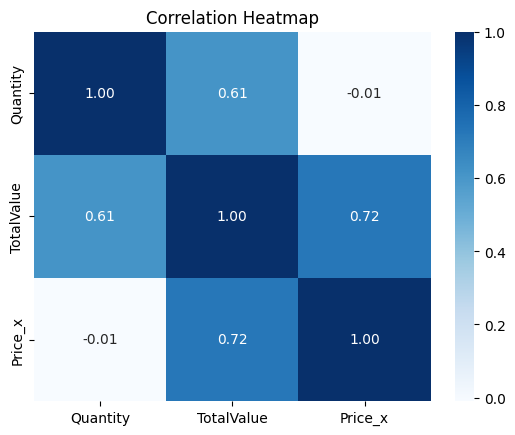

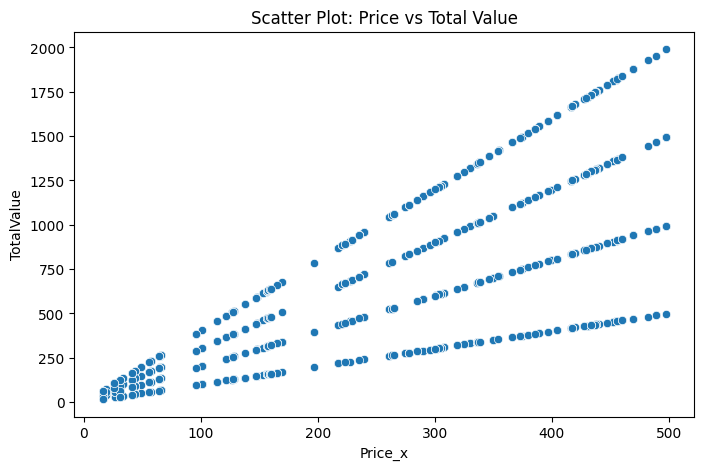

Cross Tabulation (Region vs ProductID):
ProductID      P007  P010  P023  P034  P038  P040  P041  P049  P053  P054  \
Region                                                                      
Asia              1     3     2     2     2     5     2     3     0     7   
Europe            1     3     2     3     4     3     4     3     5     2   
North America     3     1     1     4     1     1     2     6     4     2   
South America     3     4     4     0     4     4     3     3     1     5   

ProductID      P057  P060  P062  P067  P069  P070  P087  P095  
Region                                                         
Asia              2     1     3     3     5     0     2     2  
Europe            2     2     4     2     2     0     7     1  
North America     8     1     3     1     1     3     3     1  
South America     3     2     6     7     4     3     0     3  


In [35]:
# Bivariate Analysis

# Correlation heatmap for Transactions dataset (numerical features only)

# Compute the correlation matrix
correlation_matrix = transactions[[ 'Quantity', 'TotalValue','Price_x']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot for numerical variable relationships
plt.figure(figsize=(8, 5))
sns.scatterplot(x=transactions['Price_x'], y=transactions['TotalValue'])
plt.title("Scatter Plot: Price vs Total Value")
plt.show()

# Cross-tabulation for categorical variables
cross_tab = pd.crosstab(customers['Region'], transactions['ProductID'])
print("Cross Tabulation (Region vs ProductID):")
print(cross_tab)

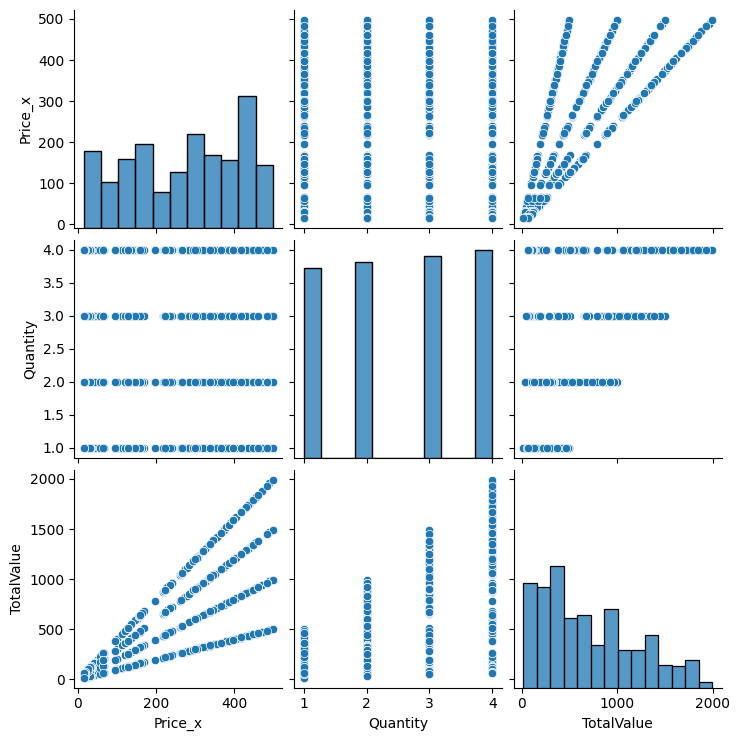

In [39]:
# Multivariate Analysis

# Pairplot for multivariate analysis of numerical variables
numeric_features = ['Price_x', 'Quantity', 'TotalValue']
sns.pairplot(transactions[numeric_features])
plt.show()



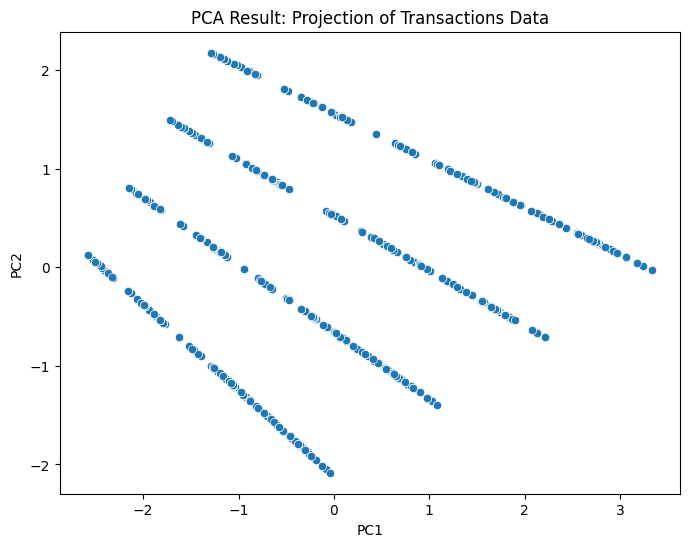

In [40]:
# Principal Component Analysis (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparing data for PCA (numerical features only)
numeric_data = transactions[numeric_features].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Applying PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Plot PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title("PCA Result: Projection of Transactions Data")
plt.show()